# LLM prompt hub

https://smith.langchain.com/hub

# Prompt library from Anthropic

https://docs.anthropic.com/en/prompt-library/library

# Examples of production-ready prompts

https://github.com/anthropics/anthropic-cookbook

# Prompt guides

- [OpenAI/ChatGPT course](https://learnprompting.org/courses/chatgpt-for-everyone)
- [Anthropic/Claude course](https://docs.google.com/spreadsheets/d/19jzLgRruG9kjUQNKtCg1ZjdD6l6weA6qRXG5zLIAhC8/edit#gid=150872633)
- [Google/Gemini guide + use cases](https://services.google.com/fh/files/misc/gemini-for-google-workspace-prompting-guide-101.pdf)

# Prompt writing tips

## ReAct approach

ReAct is Reasoning-Action approach that is used for LLM prompting.

It obviously consists of two parts:

- Reasoning: what goal model has to achieve

- Action: what action model has to do to achieve that goal

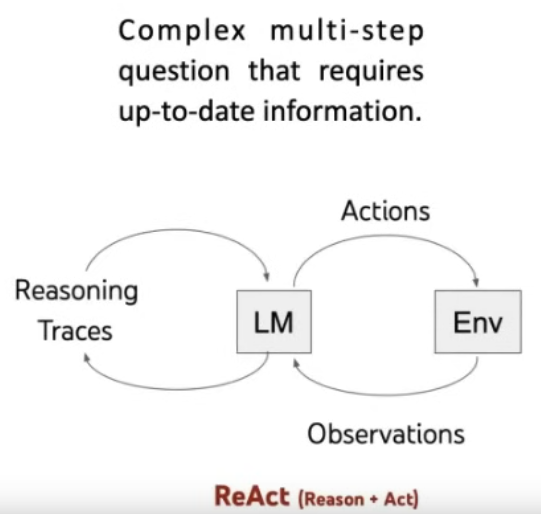

This is iterative process: model at first set intermediate goal and does some action to achive it, than it get the observations as a result of it's actions and based on them it sets the next goal, etc. untill it reaches the final goal that was set by user.

Example:

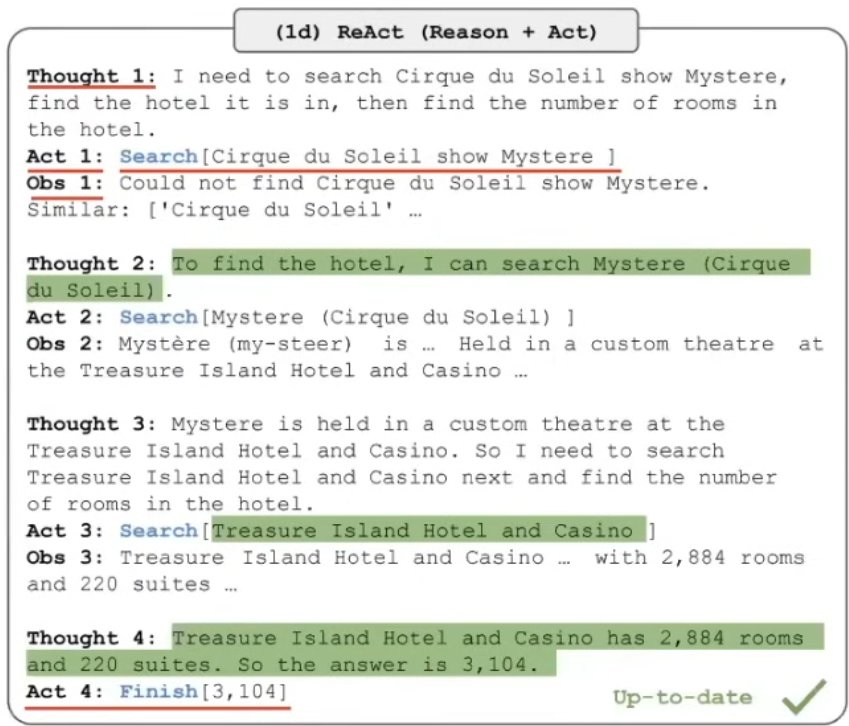

So if model struggles to fulfill your request, you can split your request on multiple subrequests and let model to fullfill each of them step-by-step.

**Prompt compontents**:

- **Role**: helps to control the behaviour of the model.

- **Context**: give LLM context about the role it should take on or what goals and overarching tasks you want it to undertake with the prompt.
E.g.: "You will be acting as an AI career coach named Joe created by the company AdAstra Careers. Your goal is to give career advice to users. 
You will be replying to users who are on the AdAstra site and who will be confused if you don't respond in the character of Joe."

- **Instruction**: expand on the specific tasks you want LLM to do, as well as any rules that LLM might have to follow. 
This is also where you can give LLM an "out" if it doesn't have an answer or doesn't know.

- **Chain of Thoughts (CoT)**

    - **Simple CoT**: For tasks with multiple steps, it's good to tell LLM to find out what steps would lead 
    to the solutions and then think step by step before giving an answer. 
    Sometimes, you might have to even say "Before you give your answer..." just to make sure LLM does this first.
    E.g.: "Think about your answer first before you respond."

    - **Casual CoT**: Don't only ask LLM to think step-by-step but write the exact steps if it's possible. E.g.:
    1. For every step at first write a reason (why are you making this conclusion)
    2. Then formulate a conclusion
    3. Mark every cause-effect relation unambigiously (Because of X hence Y)
    4. Check consistency of all CoT

    - **Program CoT**: If you want to solve mathematical/algorithmic/technic task - ask LLM to write a solution in pseudocode or Python code at first and
    then use it to solve the this task.

    - **Tree of Thoughts (ToT)**: if every step of task solution has many different options that depend on previous steps, use ToT:
     1. Split task on subtasks
     2. For every subtask research 2-3 possible solutions (branch)
     3. Assess every solution (branch) according to it's effectiveness
     4. If you find out that branch leads to a dead end - select different branch
     5. Continue until you find the solution

- **Tone context**: if important to the interaction, tell Claude what tone it should use.
E.g.: "You should maintain a friendly customer service tone."

- **Examples**: provide LLM with at least one example of an ideal response that it can emulate. Encase this in <example></example> XML tags. 
Feel free to provide multiple examples. If you do provide multiple examples, give LLM context about what it is an example of, 
and enclose each example in its own set of XML tags.

- **Input data to process**: if there is data that LLM needs to process within the prompt (e.g. user conversation history), include it here 
within relevant XML tags. Feel free to include multiple pieces of data, but be sure to enclose each in its own set of XML tags.

- **Immediate task description or request**: "remind" or tell LLM exactly what it's expected to immediately do to fulfill the prompt's task. 
This is also where you would put in additional variables like the user's question.
E.g.: "How do you respond to the user's question?".

- **Output formatting**: If there is a specific way you want LLM's response formatted, clearly tell LLM what that format is. 
E.g.: "Put your response in <response></response> tags."

### Prompt components order

Here is the main prompt components:
1. Role (R)
2. Context (C)
3. Instruction (I)
4. Format (F)
5. Limitations (L)

The best prompt components orders are:
- R-C-I-F-L (quality is 8.7/10)
- C-R-I-F-L (quality is 8.5/10)
- R-I-C-F-L (quality is 8.2/10)

But it depends on task, so you should try different prompt structures to find out the best structure of your current task.


# Main tips

- Use natural language. Write as if you’re speaking to another person. Express complete thoughts in
full sentences.

- Be specific and iterate. Tell LLM what you need it to do (summarize, write, change the
tone, create). Provide as much context as possible.

- Be concise and avoid complexity. State your request in brief — but specific — language. Avoid jargon.

- The most successful prompts average around 21 words.

- Make it a conversation. Fine-tune your prompts if the results don’t meet your expectations or if you believe
there’s room for improvement. Use follow-up prompts and an iterative process of review and refinement to
yield better results.

- If LLM doesn't have enough information - give an internet access to it, use Wikipedia articles or your own database
to help the model to collect more information about the question you ask.


- Break it up. If you want LLM to perform several related tasks, break them into separate prompts. 
For example if LLM can't fullfill task to answer the question and format it, you can at first ask
it to answer this question and after that format its previous answer. 

- Chaining prompts. If LLM returns incorrect answer, use your question and its answer as prompt and ask LLM to find
the mistakes in this answer and fix them.

- Give constraints. To generate specific results, include details in your prompt such as character count limits
or the number of options you’d like to generate.

- Assign a role. To encourage creativity, assign a role. You can do this by starting your prompt with language
like: “You are the head of a creative department for a leading advertising agency …”. If you need to solve a specific task, 
you should assign a specific role, e.g. if you want to solve linear algebra task - assign to LLM a role of specialist in linear algebra.

- For task with multiple different steps assign a multiple different roles, e.g. "As a tourist agent propose a place where it's safe for
a families with kids, as a financial travel consultant assess cost of the route, etc."

- Ask for feedback. In your conversation with LLM, tell it that you’re giving it a project,
include all the details you have and everything you know, and then describe the output you want. Continue the
conversation by asking questions like, “What questions do you have for me that would help you provide the
best output?”

- Consider tone. Tailor your prompts to suit your intended audience and desired tone of the content.
Ask for a specific tone such as formal, informal, technical, creative, or casual in the output.

- Say it another way. Fine-tune your prompts if the results don’t meet your expectations or if you believe
there’s room for improvement. An iterative process of review and refinement often yields better results.

- ChatGPT Plus subscribers can use Custom Instructions to give additional information to LLM and set its output format. 
For example you can give your name and job title to it and it will always sign the email letters correctly.

- Contrast prompting. Ask LLM to create correct and incorrect answer and explain why this answer is correct and this is not. Perfectly works with CoT.

- Chain of Drafts (CoD). Simplified version of CoT, use minimalistic but informative thought steps. Main idea: solve the task using CoT but using only 5 words for each step. Accuaracy is similar to CoT but token consumtion is only 8% of classic CoT. Can be used for expensive models like GPT-4.5 or o3-pro.

- Chain of Reasoning (CoR). Uses multiple different approaches to solve the task. E.g.:
 Solve mathematical task using CoR. Think in three steps:
  1. At first use natural language reasoning (NLR): describe with your own words how you understand the task and what conceptions can be used here, create main
     solution plan.
  2. Use algorithmic reasoning: describe your solution as structured algorithm or sequence of steps that must be made.
  3. Use symbolic reasoning: write and solve equations and formulas that are needed to find the correct answer.

- Chain-of-X (CoX). Solve the task step by step showing each step. Verify every step according to some criterias: 
  1. All conditions are understood correctly.
  2. Check answer for mathematical errors.
  3. Check if answer corresponds to the question.
  4. Check units of measurement.
  5. Check if answer meets the criteria of the common sense.
If find out the errors - fix them and make correct solution.

- Confidence assessment. Ask LLM to measure it's confidence in answer using scale from 1 to 10 (or from 1 to 100, that should be better). If confidence is lower than 7 (70) - propose alternate answer.

- Intermediate summarization. Ask LLM to make short summary in the end of each step.

- If you want LLM to work with part of text, enclose it in triple quotes ``` or with XML borders like <text_part> ... </text_part>, etc.

- Check your prompt for typos and grammatical errors. LLM is usually sensitive to them and can give incorrect results.

- Order of sentences matters. Place the most important info in the beginning of the prompt or in the end. The best way is a **Sandwitch Method** when the most important information is placed in the begining of prompt and is duplicated in another form in the end. Also in most situations (but not all, confusingly enough), LLM is more likely to choose the second of two options, possibly because in its training data from the web, second options were more likely to be correct.

- Few-shot learning: give LLM 2-3 examples of how it should answer your question and format its output.

- Hallucinations: LLM can sometimes come up with an answer based on nothing, how to tackle with them:

    - ask LLM to only answer if it knows the answer with certainty

    - a great way to reduce hallucinations on long documents is to make LLM gather evidence first, e.g. we tell LLM 
    to first extract relevant quotes, then base its answer on those quotes: 
    Example: "Please read the below document. Then, in <scratchpad> tags, pull the most relevant quote from the document 
    and consider whether it answers the user's question or whether it lacks sufficient detail. 
    Then write a brief numerical answer in <answer> tags."

    - add the internet access or RAG

    - low temperature of LLMs responses

- those tricks can additionally help in prompting

    - give to LLM N health points at the begining of conversation and take then away for bad answers

    - promise to LLM tips (like $20) for good answers

    - say to LLM that you don't have fingers on your hands, so it must answer the questions correctly and you won't have to fix its answers

Tricks above will probably cease being useful as LLMs continue to evolve.

# Example of the prompt

You are coding assistance and teaching bot. 

At first read the code and understand what it should do from the comments and function names. 

Brainstorm how you would solve this task.

Then if this code is incorrect, write why it's incorrect and offer guiding corrections if appropriate.

Use your previous brainstorm insights.

Code is encased in &lt;code&gt;&lt;/code&gt; XML tags.

Enclose the code in your answer in triple quotes ```

&lt;code&gt;

&#35; Function to print multiplicative inverses

def print_multiplicative_inverses(x, n):

&nbsp;&nbsp;&nbsp;&nbsp;for i in range(n):
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;print(x / i)
    
&lt;/code&gt;

# 5 levels of text splitting

Video

https://www.youtube.com/watch?v=8OJC21T2SL4&t=1962s

Notebook

https://github.com/FullStackRetrieval-com/RetrievalTutorials/blob/main/tutorials/LevelsOfTextSplitting/5_Levels_Of_Text_Splitting.ipynb